Theory for our own reference:

Model eq: 

```
yi = w0.phi1(xi)  + w1.phi2(xi) + .... + wm.phi(mth)(xi)
```

m = 1,2,3,......m

Where 𝑦𝑖 is the predicted target for data point xi and 𝜙𝑗(𝑥𝑖)  is the value of the Gaussian basis function for 𝑥𝑖



Matrix eq:
```
y = phi.w + error
```

Solving for weights:
```
w = inv(phi(Transponse) . phi) phi(transponse)y
```

phi is the feature matrix
```
phi(x) = [
    [phi1(x1), phi2(x1), ......., phi(mth)],
    [phi1(x2), phi2(x2),......., phi(mth)],
    ...
    ...
    ...
    [phi(xn), phi2(xn),......., phi(mth)],
]

and
phi(jth) (xi) = e^(-(xi-cj)^2) / (2.signma ^ 2)

phi = [
    [1, e^(-(x1 - c1)^2/ 2sigma ^2), ........ e^(-(x1 - cm)^2/ 2sigma ^2)],
    [1, e^(-(x2 - c1)^2/ 2sigma ^2), ........ e^(-(x2 - cm)^2/ 2sigma ^2)],
    ....
    ....
    ....
    [1, e^(-(xn - c1)^2/ 2sigma ^2), ........ e^(-(xn - cm)^2/ 2sigma ^2)],
]
```



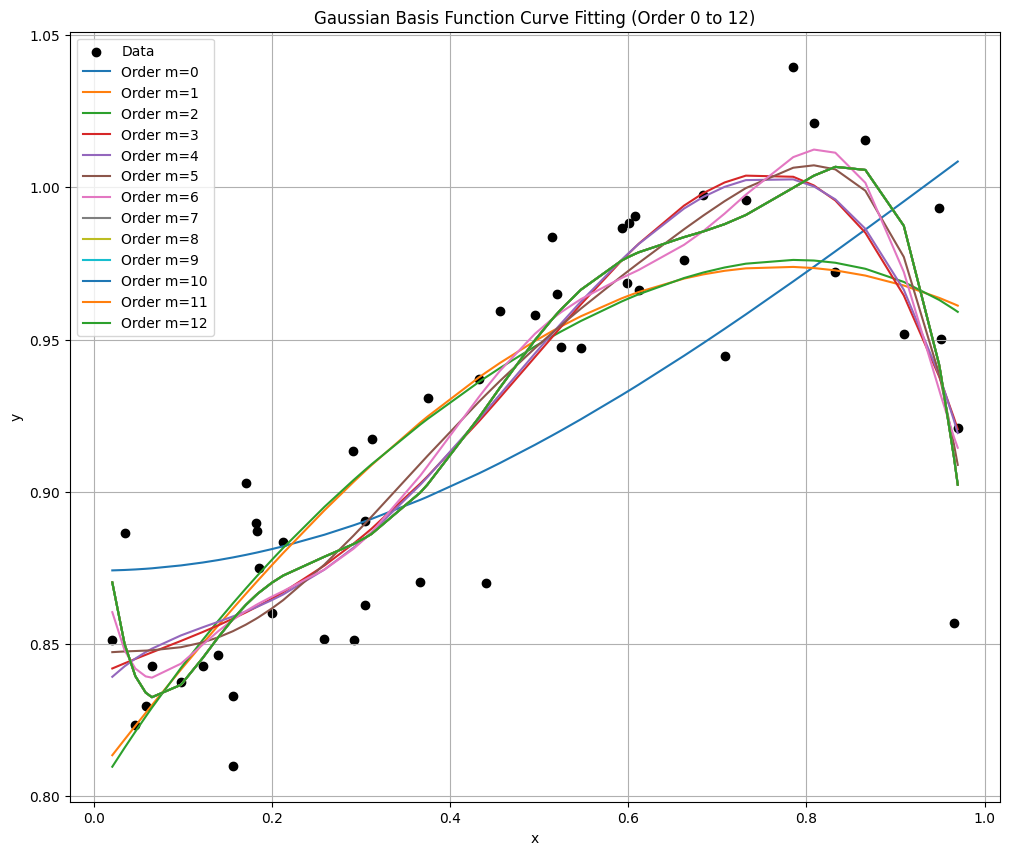

In [11]:

import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
x = np.random.uniform(0, 1, 50)
y = np.sin(1 + x**2) + np.random.normal(0, 0.03, 50)

def gaussian_basis_function_fit(x, y, m):
    # one array for bias term
    ones_array = np.ones(len(x))

    # centers -- center of the nth Gaussian basis function.
    centers = np.linspace(0, 1, m + 1)

    
    exp_values = []

    # For each xi in centers, calculate exp(-(x - xi)**2 / 2) for each element of x
    for xi in centers:
        exp_result = np.exp(-(x - xi)**2 / 2)
        exp_values.append(exp_result)

    # Stack the exponential results vertically (so that each column is one of the exp results)
    exp_matrix = np.vstack(exp_values)

    # Transpose the exp_matrix (flip rows and columns)
    transposed_exp_matrix = exp_matrix.T

    # Stack the ones_array as the first column and the transposed_exp_matrix as the second column
    phi = np.column_stack((ones_array, transposed_exp_matrix))

    # Solve for weights using a least squares solution
    w = np.linalg.lstsq(phi, y, rcond=None)[0]
    return phi @ w  # Predicted values

# Plotting the results for different orders m = 0 to 12
plt.figure(figsize=(12, 10))
plt.scatter(x, y, color='black', label="Data")

for m in range(13):
    y_pred = gaussian_basis_function_fit(x, y, m)
    plt.plot(np.sort(x), y_pred[np.argsort(x)], label=f'Order m={m}')

plt.title('Gaussian Basis Function Curve Fitting (Order 0 to 12)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
